# 

# Predict stock forecast

An attempt to predict stock forecast with data from https://finance.yahoo.com.

My idea is to use historical data to train the model through supervised learning to find out if to buy (1) or not buy (0) stock a certain date.

In [92]:
import datetime

import yfinance as yf

Defining constants

In [93]:
YEARS = 4
SYMBOL = "MSFT"

start = datetime.date.today() - datetime.timedelta(days=YEARS * 365)
end = datetime.datetime.today()

Library yfinance parses data from Yahoo finance, in this case MSFT data 4 years prior.

In [94]:
data = yf.download(SYMBOL, start, end)
data.to_csv(r'data\msft_data.csv')

[*********************100%***********************]  1 of 1 completed


In [95]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Plot on closing 120 days prior.

<Axes: xlabel='Date'>

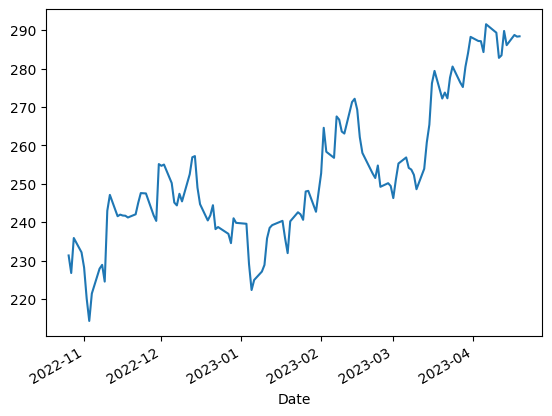

In [96]:
tmp = data.iloc[-120:]  # 120 days
tmp['Close'].plot()

Smooths dataset 

<Axes: xlabel='Date'>

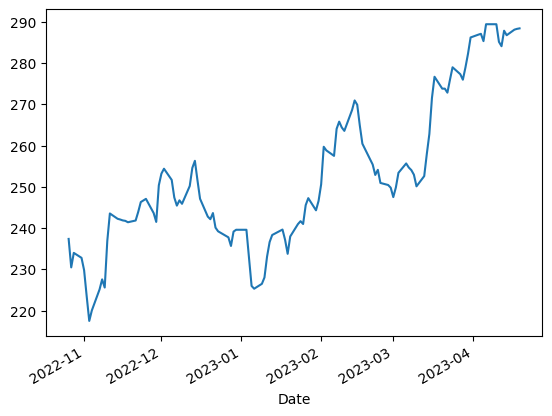

In [97]:
# alpha as weight factor, weight recent values more
data = data.ewm(alpha=0.65).mean()
temp = data.iloc[-120:]  # 120 days
temp['Close'].plot()

The historical data is not very rich of features. Open, High, Low, Adj Close are not very interesting as Close can fulfil the need. FinTA library can do financial analysis with list of symbols as indicators:

In [98]:
from finta import TA

# From finTA use the following indicators:

"""
RSI - Relative Strength Index
MACD = Moving Average Convergence Divergence
STOCH = Stochastic Oscillator
ADL = Accumulation/Distribution Line
ATR = Average True Range
MOM = Momentum
MFI = Money Flow Index
ROC = Rate of Change
OBV = On Balance Volume
CCI = Commodity Channel Index
EMV = Ease of Movement
VORTEX = Vortex Indicator
"""

INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']








In [99]:
# Lower columns needed for finta processing
data.columns = data.columns.str.lower()

for indicator in INDICATORS:
    indicator_data = eval(f'TA.{indicator}(data)')

    # Add indicator to dataframe
    data = data.merge(indicator_data, left_index=True, right_index=True)
data.columns = data.columns.str.replace('.', '')

# Exponential Moving Average (EMA) - 50, 20, 15, 5 used in this case
data['ema50'] = data['close'].ewm(50).mean()
data['ema20'] = data['close'].ewm(20).mean()
data['ema15'] = data['close'].ewm(15).mean()
data['ema5'] = data['close'].ewm(5).mean()

# Can use normalized volume instead of actual
data['norm_volume'] = data['volume'] / data['volume'].ewm(5).mean()
# Drop unnecessary columns
data.drop(columns=['open', 'high', 'low', 'adj close', 'volume'], axis=1, inplace=True)

data.columns


Index(['close', '14 period RSI', 'MACD', 'SIGNAL', '14 period STOCH %K', 'MFV',
       '14 period ATR', 'MOM', '14 period MFI', 'ROC', 'OBV', '20 period CCI',
       '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema20', 'ema15', 'ema5',
       'norm_volume'],
      dtype='object')

In [103]:
data.to_csv(r'data\msft_data_emw.csv')

In [104]:
data.head(10)

,close,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema20,ema15,ema5,norm_volume
Date,,,,,,,,,,,,,,,,,,,,
2019-04-22,123.760002,NaN,0.000000,0.000000,NaN,1.039604e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.760002,123.760002,123.760002,123.760002,1.000000
2019-04-23,125.004447,100.000000,0.027920,0.015511,NaN,2.789945e+07,NaN,NaN,NaN,NaN,2.185374e+07,66.666667,NaN,NaN,NaN,124.388385,124.397401,124.402296,124.438790,1.148186
2019-04-24,125.008220,100.000000,0.035693,0.023782,NaN,3.164511e+07,NaN,NaN,NaN,NaN,5.009339e+07,72.078646,NaN,NaN,NaN,124.599101,124.611018,124.617437,124.664059,1.245390
2019-04-25,127.741387,100.000000,0.137033,0.062147,NaN,1.258971e+07,NaN,NaN,NaN,NaN,8.479629e+07,133.333333,NaN,NaN,NaN,125.408159,125.451781,125.475575,125.654674,1.307219
2019-04-26,129.145359,100.000000,0.245083,0.116566,NaN,8.536227e+06,NaN,NaN,NaN,NaN,1.122801e+08,100.704980,NaN,NaN,NaN,126.185491,126.264279,126.307187,126.627353,1.025204
2019-04-29,129.552126,100.000000,0.322822,0.172473,NaN,7.078291e+06,NaN,NaN,NaN,NaN,1.324968e+08,83.724426,NaN,NaN,NaN,126.774737,126.881197,126.938860,127.360266,0.803641
2019-04-30,130.233687,100.000000,0.397992,0.229546,NaN,1.969285e+07,NaN,NaN,NaN,NaN,1.552825e+08,79.490236,NaN,NaN,NaN,127.298707,127.432984,127.505372,128.024563,0.925936
2019-05-01,128.703444,76.349834,0.369219,0.263112,NaN,4.147061e+06,NaN,NaN,NaN,NaN,1.298728e+08,52.089277,NaN,NaN,NaN,127.486707,127.620192,127.691048,128.171998,1.025314
2019-05-02,127.082577,60.128508,0.263259,0.263146,NaN,-9.201308e+06,NaN,NaN,NaN,NaN,1.032017e+08,2.996372,NaN,NaN,NaN,127.438166,127.548156,127.604730,127.946779,1.059520


In [105]:
# TODO 1. Extract sample data for later predictions with training set and test set.
# TODO 2. Create 0 and 1 values by comparing one day from another with df.shift().
# TODO 3. Drop NaN values.
# TODO 4. Model creation. Will try KNN, Random forest model, SVM.
